In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [136]:
colors = ['b', 'r', 'g', 'orange', 'purple']

## AC 299r: Machine Learning Acceleration
##Sebastian, Martin, Jason, Lara

Below is our notebook to aggregate the variety of different experiments we conducted this semester for our capstone project. The algorithms, experiments, and results in our final presentation are shown below

## First Experiment: Linear regression

The goal of the this part of the notebook is to explore if prior clustering of input data could help reduce the training dataset size while keeping a good accuracy. We are going to test this strategy on linear regression, polynomial regression & logistic regression. The hope is that by removing outliers and by clustering the dataset, we create enough structure so to delete some part of the dataset without loosing accuracy.

The idea is as follow
- cluster the training dataset in K clusters
- delete x% of the dataset
- train the model on each shrinked cluster
- compute the weighted average model found for each cluster

### **Classic**

In [137]:
#Create data
n = 100
beta_1 = 1
beta_2 = 0
noise = np.random.normal(0, 0.5, n)
x = np.random.rand(n)
X = np.array(x).reshape(-1, 1)
y = beta_1 * x + beta_2 + noise

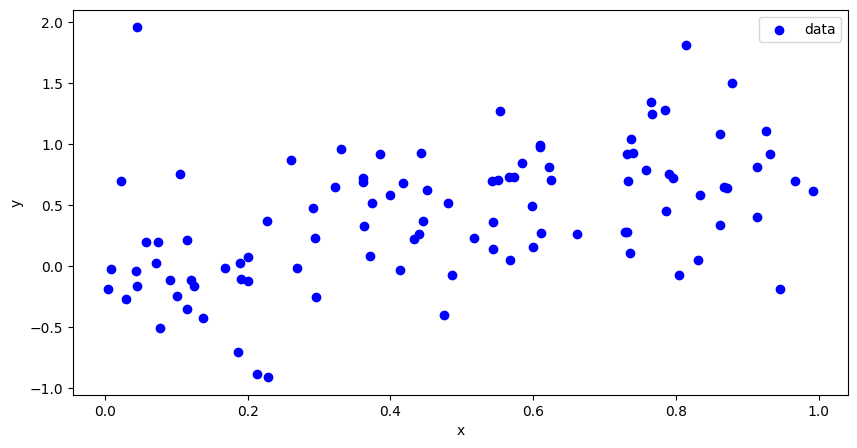

In [138]:
# Plot the data points
plt.figure(figsize = (10, 5))
plt.scatter(X, y, label = "data", color = colors[0])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **Full dataset**

In [139]:
#Fit model
model = LinearRegression()
model.fit(X, y)
beta_1_pred =  model.coef_[0]
beta_2_pred = model.intercept_

In [140]:
#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", np.sqrt((beta_1 - beta_1_pred)**2))
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  0.9262280365561755
beta_2 real       :  0
beta_2 prediction :  -0.026800267159286573
Coefficient beta_1 MSE :  0.07377196344382453
Coefficient beta_2 MSE :  0.0007182543198091343


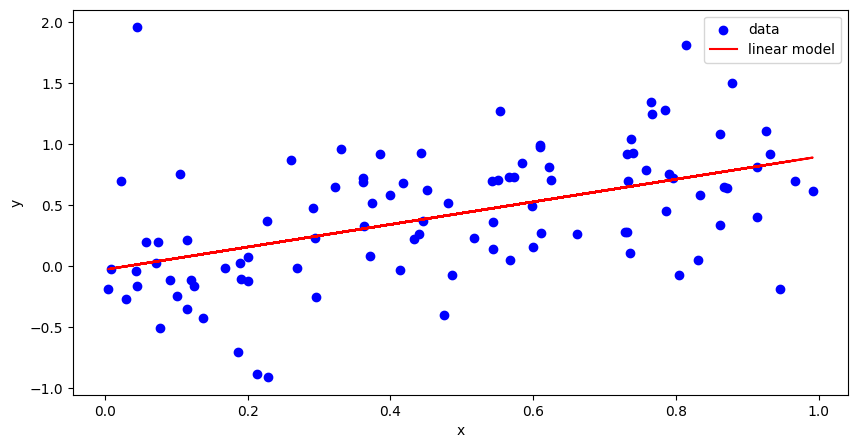

In [141]:
#Plot fitted model and data
plt.figure(figsize = (10, 5))
plt.scatter(X, y, label = "data", color = colors[0])
plt.plot(X, [beta_1_pred * x + beta_2_pred for x in X], label = "linear model", color = colors[1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **Random**

First we train on a random set of data points

In [142]:
#divide the data
X_first_half, y_first_half    = X[:n//2], y[:n//2]
X_second_half, y_second_half  = X[n//2:], y[n//2:]

In [143]:
def genreate_random_indices(n):
    indices = set()
    while len(indices) < n//4:
        indices.add(np.random.randint(n//2, n - 1))
    return list(indices)

In [144]:
#Fit original model on half data
model = LinearRegression()
model.fit(X_first_half, y_first_half)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Compute distances
index_random = genreate_random_indices(n)

X_random, y_random = X[index_random], y[index_random]

#Fit on outliers
model.fit(X_random, y_random)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", np.sqrt((beta_1 - beta_1_pred)**2))
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  1.3332862100817344
beta_2 real       :  0
beta_2 prediction :  -0.24145131232571426
Coefficient beta_1 MSE :  0.3332862100817344
Coefficient beta_2 MSE :  0.058298736223809614


### **Without redundants**

Now we remove redundant data or data that is close to the prediction

In [145]:
#Fit original model on half data
model = LinearRegression()
model.fit(X_first_half, y_first_half)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Compute distances
dist = [(y - x * beta_1_pred - beta_2_pred)**2 for x,y in zip(X_second_half, y_second_half)]
sorted_dist = sorted(dist)
index_outliers = [i for i in range(len(dist)) if dist[i] > sorted_dist[len(sorted_dist) // 2]]

X_outliers, y_outliers = X_second_half[index_outliers], y_second_half[index_outliers]

#Fit on outliers
model.fit(X_outliers, y_outliers)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", np.sqrt((beta_1 - beta_1_pred)**2))
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  1.341030998266513
beta_2 real       :  0
beta_2 prediction :  -0.3044667125946345
Coefficient beta_1 MSE :  0.34103099826651295
Coefficient beta_2 MSE :  0.09269997907818375


### **Without outliers**

We now remove outlier or data that is far from the model predicion

In [146]:
#Fit original model on half data
model = LinearRegression()
model.fit(X_first_half, y_first_half)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Compute distances
dist = [(y - x * beta_1_pred - beta_2_pred)**2 for x,y in zip(X_second_half, y_second_half)]
sorted_dist = sorted(dist)
index_redundants = [i for i in range(len(dist)) if dist[i] <= sorted_dist[len(sorted_dist) // 2]]

X_redundants, y_redundants = X_second_half[index_redundants], y_second_half[index_redundants]

#Fit on redundants
model.fit(X_redundants, y_redundants)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", np.sqrt((beta_1 - beta_1_pred)**2))
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  0.913845194878358
beta_2 real       :  0
beta_2 prediction :  -0.01175032611383564
Coefficient beta_1 MSE :  0.08615480512164198
Coefficient beta_2 MSE :  0.0001380701637814878


### **With shrinkage**

Next we experiment with the effect shrinking the data this has on our experiments

In [147]:
#Shrink the input data (66 instead of 100)
shrink = 1.5                              #data shrinkage coefficient
random_indices = np.random.randint(0, len(X), int(len(X) / shrink))
X_shrinked, y_shrinked = X[random_indices], y[random_indices]

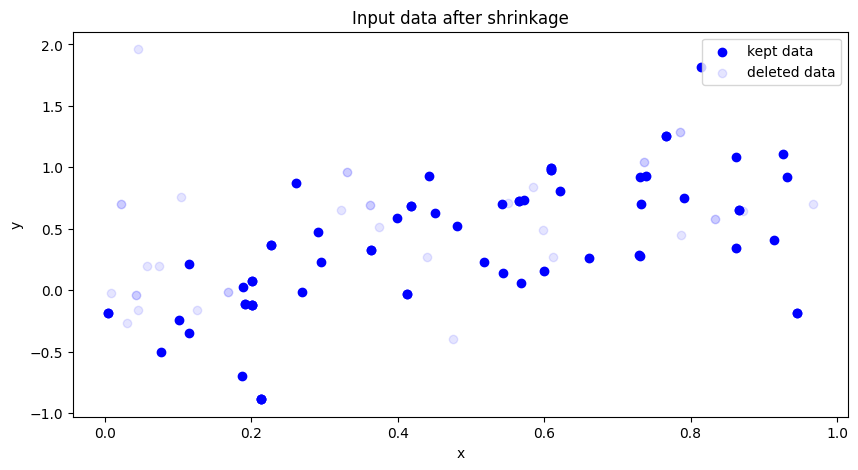

In [148]:
plt.figure(figsize = (10, 5))
plt.scatter(X[~random_indices], y[~random_indices], color=colors[0], label = "kept data")
plt.scatter(X[random_indices], y[random_indices], color=colors[0], alpha = 0.1, label = "deleted data")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Input data after shrinkage")
plt.legend()
plt.show()

In [149]:
#Fit model
model = LinearRegression()
model.fit(X_shrinked, y_shrinked)
beta_1_pred = model.coef_[0]
beta_2_pred = model.intercept_

In [150]:
#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  0.6766850712988989
beta_2 real       :  0
beta_2 prediction :  0.20483213595520788
Coefficient beta_1 MSE :  0.1045325431209981
Coefficient beta_2 MSE :  0.04195620391997277


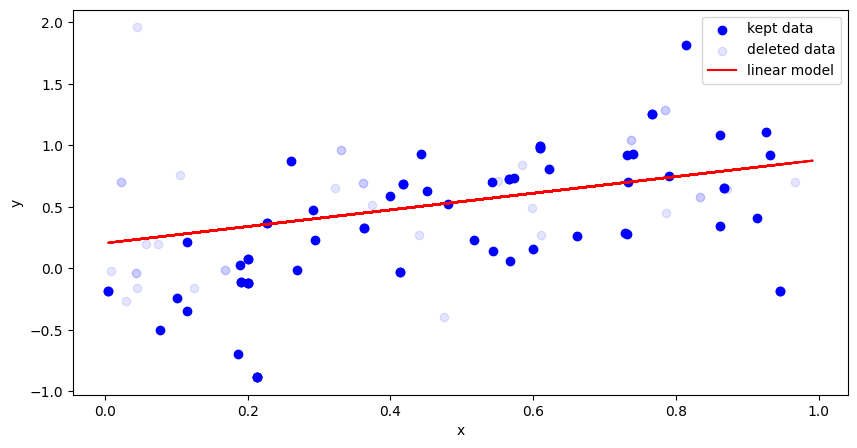

In [151]:
#Plot fitted model and data
plt.figure(figsize = (10, 5))
plt.scatter(X[~random_indices], y[~random_indices], color=colors[0], label = "kept data")
plt.scatter(X[random_indices], y[random_indices], color=colors[0], alpha = 0.1, label = "deleted data")
plt.plot(X, [beta_1_pred * x + beta_2_pred for x in X], label = "linear model", color = colors[1])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [152]:
def input_shrinker(X, y, shrink = 1.5):
  """ X : input array of features
      y : output array
      shrink : coefficient to shrink dataset (1 means no shrinkage, 2 means divided by 2)
  """
  random_indices = np.random.randint(0, len(X), int(len(X) / shrink))
  X_shrinked, y_shrinked = X[random_indices], y[random_indices]
  return X_shrinked, y_shrinked

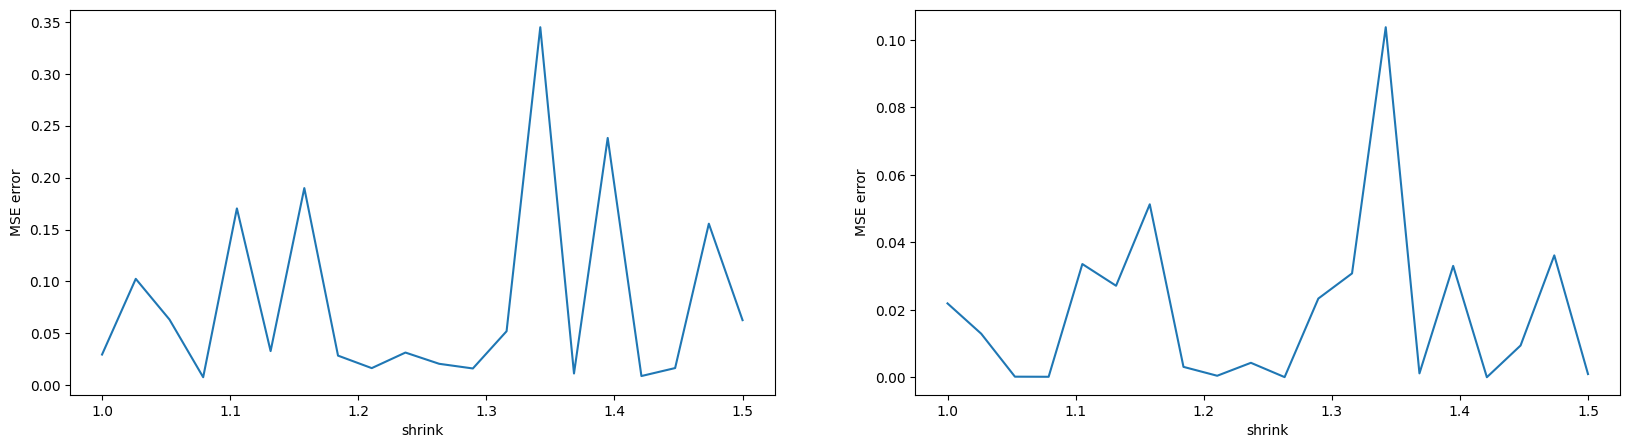

In [153]:
MSEs_1 = []
MSEs_2 = []
for shrink in np.linspace(1, 1.5, 20):
  X_shrinked, y_shrinked= input_shrinker(X, y, shrink)
  model = LinearRegression()
  model.fit(X_shrinked, y_shrinked)
  beta_1_pred = model.coef_[0]
  beta_2_pred = model.intercept_
  MSEs_1.append((beta_1 - beta_1_pred)**2)
  MSEs_2.append((beta_2 - beta_2_pred)**2)


fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(np.linspace(1, 1.5, 20), MSEs_1, label = "Error on beta_1 prediction")
axs[0].set_xlabel("shrink")
axs[0].set_ylabel("MSE error")
axs[1].plot(np.linspace(1, 1.5, 20), MSEs_2, label = "Error on beta_2 prediction")
axs[1].set_xlabel("shrink")
axs[1].set_ylabel("MSE error")
plt.show()

Shrinking the data leads to relatively similar outcomes in terms of MSE

### **With shrinkage and clustering**

In this section, we first cluster the data, and then only train our model on a shrinked part of each cluster

In [154]:
#Cluster the input in classes
K = 2                                   #number of clusters
shrink = 1.5                              #data shrinkage
kmeans = KMeans(n_clusters=K, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [155]:
#Shrink the input data
labels = kmeans.labels_
X_shrinked = {k: [] for k in range(K)}
y_shrinked = {k: [] for k in range(K)}
for k in range(K):
  X_k = X[labels == k]
  y_k = y[labels == k]
  random_indices = np.random.randint(0, len(X_k), int(len(X_k) / shrink))
  X_shrinked[k] = X_k[random_indices]
  y_shrinked[k] = y_k[random_indices]

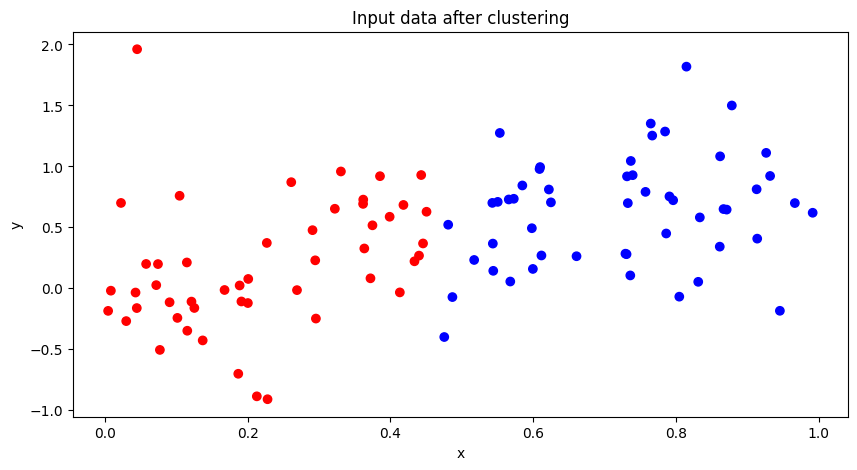

In [156]:
plt.figure(figsize = (10, 5))
plt.scatter(X[:,0], y, c=[colors[label] for label in labels])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Input data after clustering")
plt.show()

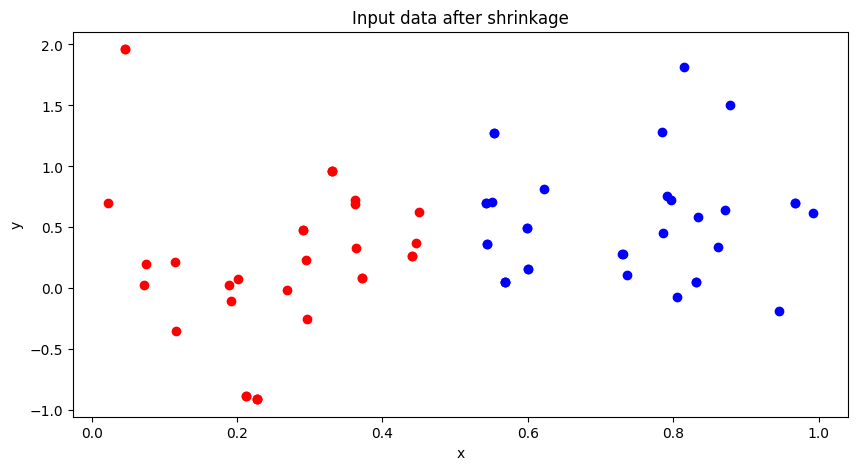

In [157]:
plt.figure(figsize = (10, 5))
for k in range(K):
  plt.scatter(X_shrinked[k], y_shrinked[k], c=colors[k])
plt.xlabel('x')
plt.ylabel('y')
plt.title("Input data after shrinkage")
plt.show()

In [158]:
#Fit model
beta_1_pred = 0
beta_2_pred = 0
cluster_sizes = np.bincount(labels)
for k in range(K):
  model = LinearRegression()
  model.fit(X_shrinked[k], y_shrinked[k])
  beta_1_pred += model.coef_[0] * cluster_sizes[k] / n
  beta_2_pred += model.intercept_ * cluster_sizes[k] / n

In [159]:
#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("beta_2 real       : ", beta_2)
print("beta_2 prediction : ", beta_2_pred)
print("Coefficient beta_1 MSE : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_2 MSE : ", (beta_2 - beta_2_pred)**2)

beta_1 real       :  1
beta_1 prediction :  -0.03181019307116846
beta_2 real       :  0
beta_2 prediction :  0.3552933602428023
Coefficient beta_1 MSE :  1.064632274525562
Coefficient beta_2 MSE :  0.12623337183262168


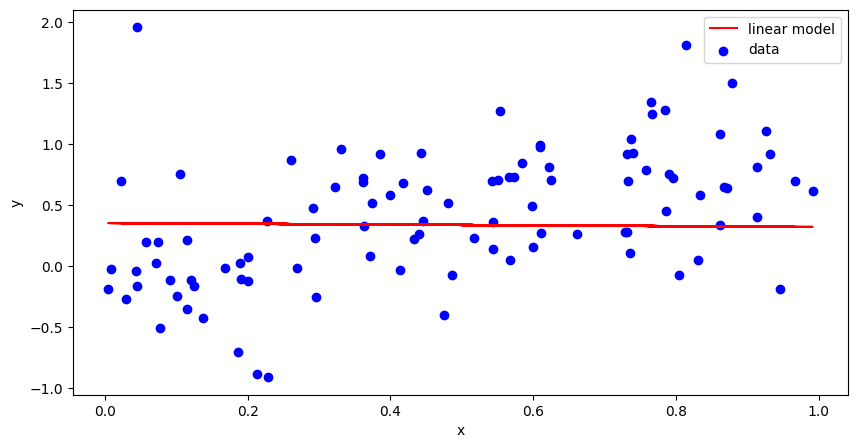

In [160]:
#Plot fitted model and data
plt.figure(figsize = (10, 5))
plt.plot(X, [beta_1_pred * x + beta_2_pred for x in X], label = "linear model", color = "r")
plt.scatter(X, y, label = "data", color = "b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **Error for different shrinkage**

In [161]:
def input_cluster_shrinker(X, y, shrink = 1.5, K = 2):
  """ X : input array of features
      y : output array
      shrink : coefficient to shrink dataset (1 means no shrinkage, 2 means divided by 2)
      K : number of clusters"""
  kmeans = KMeans(n_clusters=K, n_init = 10)
  kmeans.fit(X)
  labels = kmeans.labels_
  cluster_sizes = np.bincount(labels)
  X_shrinked = {k: [] for k in range(K)}
  y_shrinked = {k: [] for k in range(K)}
  for k in range(K):
    X_k = X[labels == k]
    y_k = y[labels == k]
    random_indices = np.random.randint(0, len(X_k), int(len(X_k) / shrink))
    X_shrinked[k] = X_k[random_indices]
    y_shrinked[k] = y_k[random_indices]
  return X_shrinked, y_shrinked, cluster_sizes

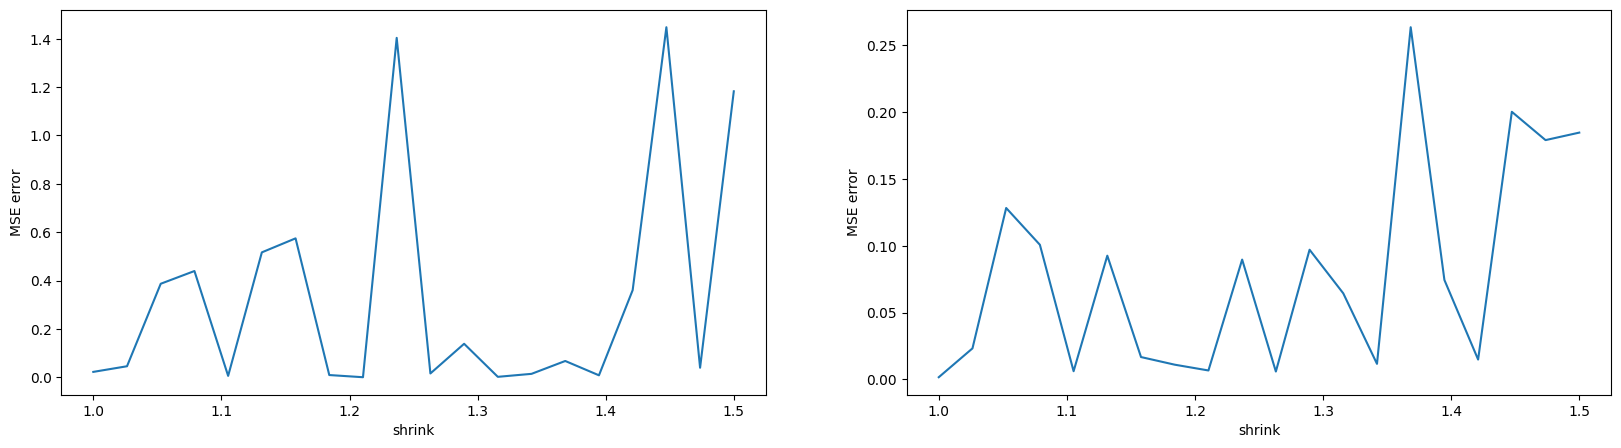

In [162]:
MSEs_1 = []
MSEs_2 = []
for shrink in np.linspace(1, 1.5, 20):
  X_shrinked, y_shrinked, cluster_sizes= input_cluster_shrinker(X, y, shrink, K)
  beta_1_pred = 0
  beta_2_pred = 0
  for k in range(K):
    model = LinearRegression()
    model.fit(X_shrinked[k], y_shrinked[k])
    beta_1_pred += model.coef_[0] * cluster_sizes[k] / (n / shrink)
    beta_2_pred +=  model.intercept_ * cluster_sizes[k] / (n / shrink)
  MSEs_1.append((beta_1 - beta_1_pred)**2)
  MSEs_2.append((beta_2 - beta_2_pred)**2)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
axs[0].plot(np.linspace(1, 1.5, 20), MSEs_1, label = "Error on beta_1 prediction")
axs[0].set_xlabel("shrink")
axs[0].set_ylabel("MSE error")
axs[1].plot(np.linspace(1, 1.5, 20), MSEs_2, label = "Error on beta_2 prediction")
axs[1].set_xlabel("shrink")
axs[1].set_ylabel("MSE error")
plt.show()

## **Logistic regression**

We now try and repeat our methodology on a Logistic Regression

### **Classic**

In [163]:
#Create data
n = 100
norm = 2
beta_1 = np.random.randn(2)
beta_1 = norm * beta_1 / np.linalg.norm(beta_1)

X = np.empty((n, 2))
y = np.empty((n, ))
for i in range(n):
    if np.random.rand() < 0.5:
        X[i] = beta_1  + np.random.normal(0, 1, 2)
        y[i] = 1
    else:
        X[i] = -beta_1  + np.random.normal(0, 1, 2)
        y[i] = 0

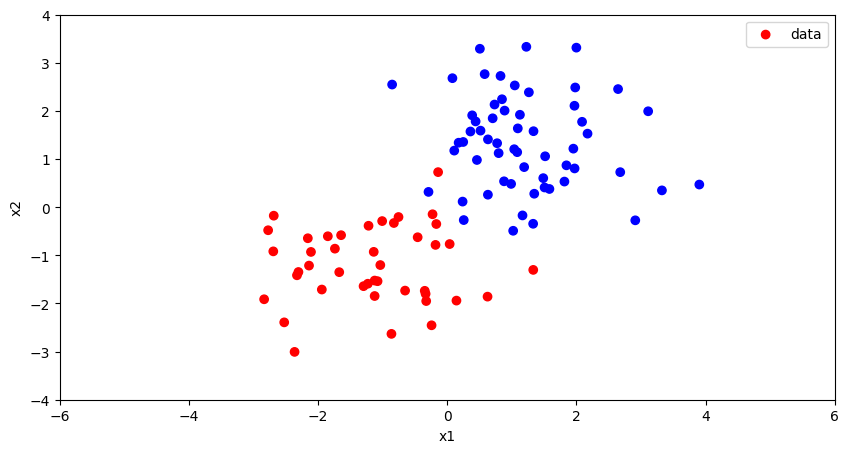

In [164]:
# Plot the data points
plt.figure(figsize = (10, 5))
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(colors[:2]), label = "data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.legend()
plt.show()

In [165]:
#Fit model
model = LogisticRegression()
model.fit(X, y)
beta_1_pred =  model.coef_[0]
beta_2_pred = model.intercept_

In [166]:
#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("Coefficient beta_1 MSE : ", (beta_1 - beta_1_pred)**2)

beta_1 real       :  [-1.32067778 -1.50193549]
beta_1 prediction :  [-1.76453794 -1.90556358]
Coefficient beta_1 MSE :  [0.19701184 0.16291564]


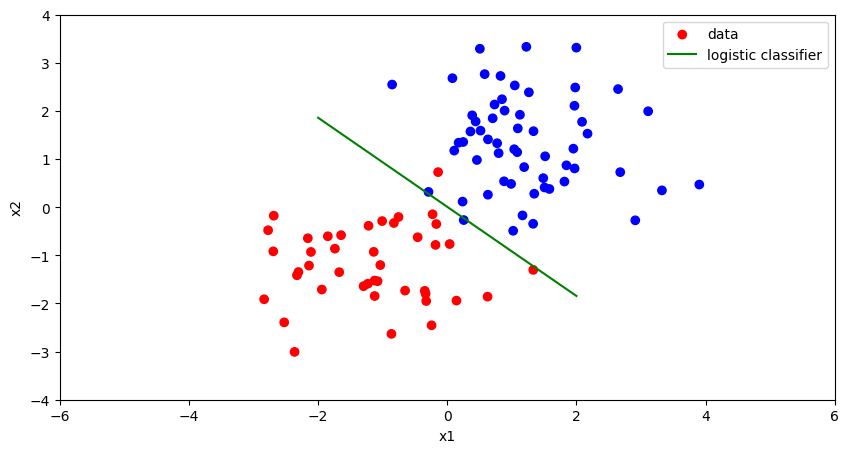

In [167]:
# Plot the data points
plt.figure(figsize = (10, 5))
x1 = np.linspace(-norm, norm, 50)
x2 = -(beta_1_pred[0]/beta_1_pred[1]) * x1 - (beta_2_pred/beta_1_pred[1])
plt.scatter(X[:,0], X[:,1], c=y, cmap=ListedColormap(colors[:2]), label = "data")
plt.plot(x1, x2, label = "logistic classifier", color = colors[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.legend()
plt.show()

### **With shrinkage**

In [168]:
#Shrink the input data
shrink = 1.5                              #data shrinkage coefficient
random_indices = np.random.randint(0, len(X), int(len(X) / shrink))
X_shrinked, y_shrinked = X[random_indices], y[random_indices]

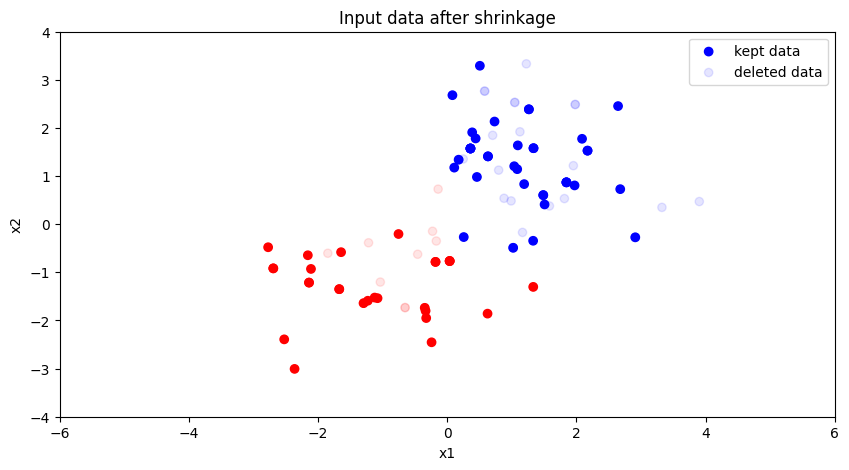

In [169]:
plt.figure(figsize = (10, 5))
plt.scatter(X[random_indices,0], X[random_indices,1], c=y[random_indices], cmap=ListedColormap(colors[:2]), label = "kept data")
plt.scatter(X[~random_indices,0], X[~random_indices,1], c=y[~random_indices], alpha = 0.1, cmap=ListedColormap(colors[:2]), label = "deleted data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.title("Input data after shrinkage")
plt.legend()
plt.show()

In [170]:
#Fit model
model = LogisticRegression()
model.fit(X_shrinked, y_shrinked)
beta_1_pred =  model.coef_[0]
beta_2_pred = model.intercept_

In [171]:
#Print accuracy
print("beta_1 real       : ", beta_1)
print("beta_1 prediction : ", beta_1_pred)
print("Coefficient beta_1 MSE : ", (beta_1 - beta_1_pred)**2)

beta_1 real       :  [-1.32067778 -1.50193549]
beta_1 prediction :  [-1.37912975 -1.95784254]
Coefficient beta_1 MSE :  [0.00341663 0.20785124]


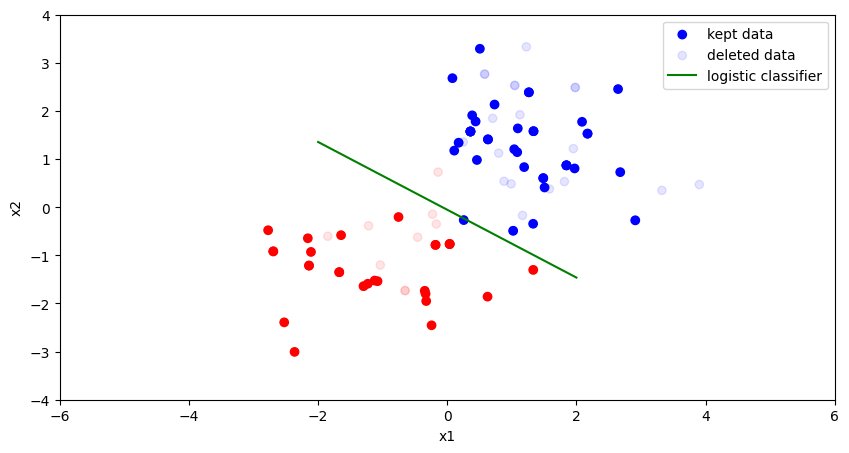

In [172]:
# Plot the data points
plt.figure(figsize = (10, 5))
x1 = np.linspace(-norm, norm, 50)
x2 = -(beta_1_pred[0]/beta_1_pred[1]) * x1 - (beta_2_pred/beta_1_pred[1])
plt.scatter(X[random_indices,0], X[random_indices,1], c=y[random_indices], cmap=ListedColormap(colors[:2]), label = "kept data")
plt.scatter(X[~random_indices,0], X[~random_indices,1], c=y[~random_indices], alpha = 0.1, cmap=ListedColormap(colors[:2]), label = "deleted data")
plt.plot(x1, x2, label = "logistic classifier", color = colors[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.legend()
plt.show()

Shrinkage appears to bring about similar results

In [173]:
def input_shrinker(X, y, shrink = 1.5):
  """ X : input array of features
      y : output array
      shrink : coefficient to shrink dataset (1 means no shrinkage, 2 means divided by 2)
  """
  random_indices = np.random.randint(0, len(X), int(len(X) / shrink))
  X_shrinked, y_shrinked = X[random_indices], y[random_indices]
  return X_shrinked, y_shrinked

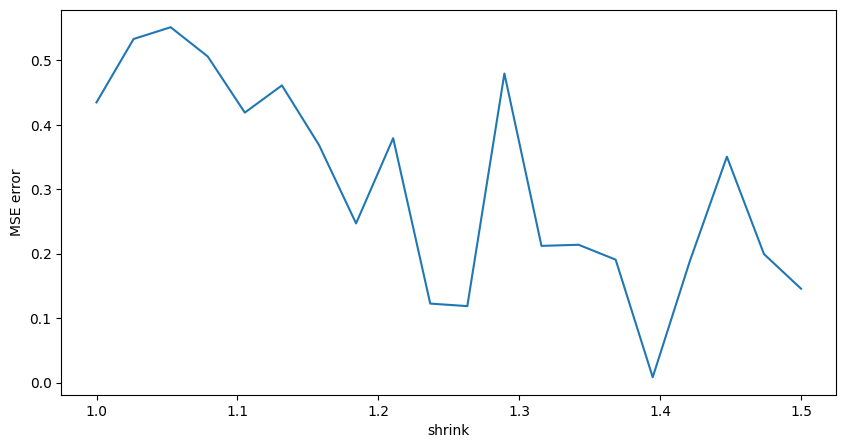

In [174]:
MSEs_1 = []
for shrink in np.linspace(1, 1.5, 20):
  X_shrinked, y_shrinked= input_shrinker(X, y, shrink)
  model = LogisticRegression()
  model.fit(X_shrinked, y_shrinked)
  beta_1_pred = model.coef_[0]
  MSEs_1.append(np.sum(np.square((beta_1 - beta_1_pred))))


fig= plt.figure(figsize=(10, 5))
plt.plot(np.linspace(1, 1.5, 20), MSEs_1, label = "Error on beta_1 prediction")
plt.xlabel("shrink")
plt.ylabel("MSE error")
plt.show()

### **With shrinkage and clustering**

In this section, we first cluster the data, and then only train our model on a shrinked part of each cluster

In [175]:
#Cluster the input in classes
K = 2                                   #number of clusters
shrink = 1.5                              #data shrinkage
kmeans = KMeans(n_clusters=K, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [176]:
#Shrink the input data
labels = kmeans.labels_
X_shrinked = {k: [] for k in range(K)}
y_shrinked = {k: [] for k in range(K)}
for k in range(K):
  X_k = X[labels == k]
  y_k = y[labels == k]
  random_indices = np.random.randint(0, len(X_k), int(len(X_k) / shrink))
  X_shrinked[k] = X_k[random_indices]
  y_shrinked[k] = y_k[random_indices]

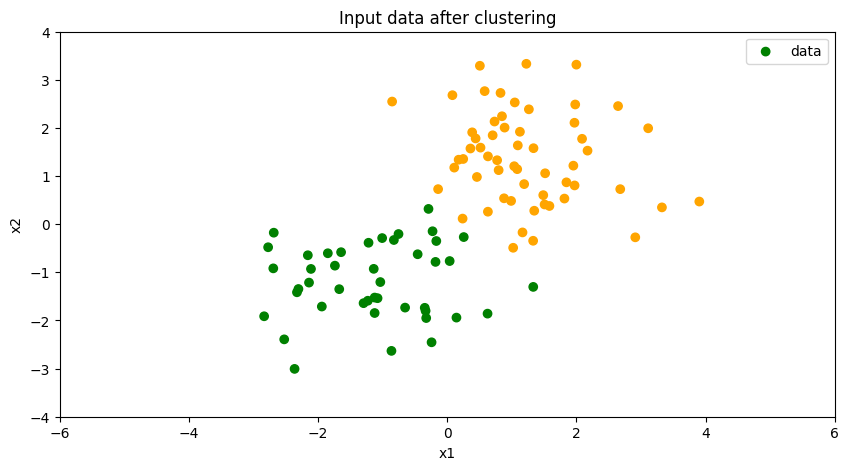

In [177]:
plt.figure(figsize = (10, 5))
plt.scatter(X[:,0], X[:,1], c=[colors[label + 2] for label in labels], label = "data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.title("Input data after clustering")
plt.legend()
plt.show()

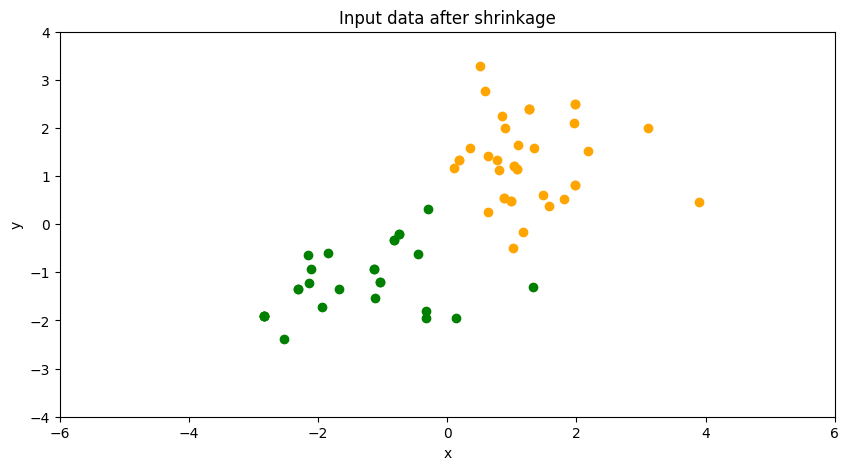

In [178]:
plt.figure(figsize = (10, 5))
for k in range(K):
  plt.scatter(X_shrinked[k][:,0], X_shrinked[k][:,1], c = colors[k + 2])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.title("Input data after shrinkage")
plt.show()

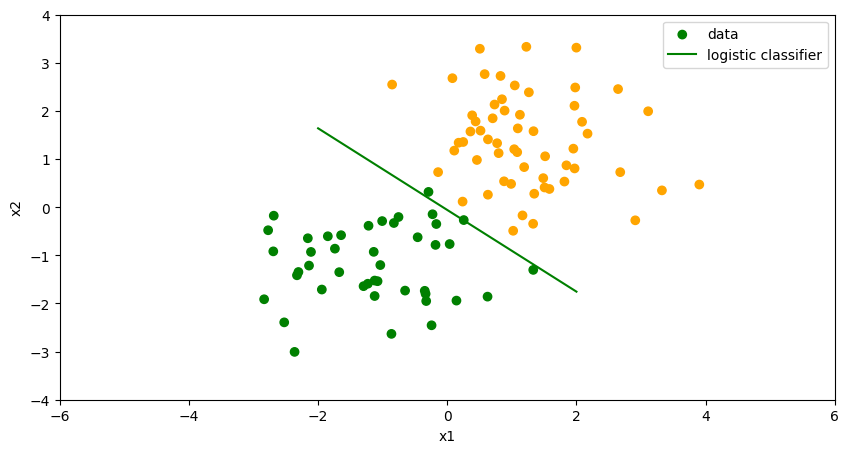

In [179]:
# Plot the data points
plt.figure(figsize = (10, 5))
x1 = np.linspace(-norm, norm, 50)
x2 = -(beta_1_pred[0]/beta_1_pred[1]) * x1 - (beta_2_pred/beta_1_pred[1])
plt.scatter(X[:,0], X[:,1], c=[colors[label + 2] for label in labels], label = "data")
plt.plot(x1, x2, label = "logistic classifier", color = colors[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-3 * norm, 3 * norm)
plt.ylim(-2 * norm, 2 * norm)
plt.legend()
plt.show()

## **Second Experimen: KMeans**

In this part we use K-Means classifier on a 2 clusters *unsupervised* problem. We compare training on the whole data, training on data close to the currently predicted centers, training on data far from the currently predicted centers.

For each parts, we divide the dataset in two halfs and then,
1. Train on the two halfs a KMeans
2. Train on the first half a KMeans, then dynamically remove points that are outliers (far from current centers)
3. Train on the first half a KMeans, then dynamically remove points that are redundants (close to current centers)

In [180]:
#Create data
n = 1000
signal_to_noise_ratio = 1
beta_1 = np.random.randn(2)
beta_1 = (2 *(beta_1[0] > 0) - 1) * beta_1
beta_1 = beta_1 / np.linalg.norm(beta_1)


X = np.empty((n, 2))
y = np.empty((n, ))
for i in range(n):
    if np.random.rand() < 0.5:
        X[i] = beta_1  + np.random.normal(0, signal_to_noise_ratio, 2)
        y[i] = 1
    else:
        X[i] = -beta_1  + np.random.normal(0, signal_to_noise_ratio, 2)
        y[i] = 0

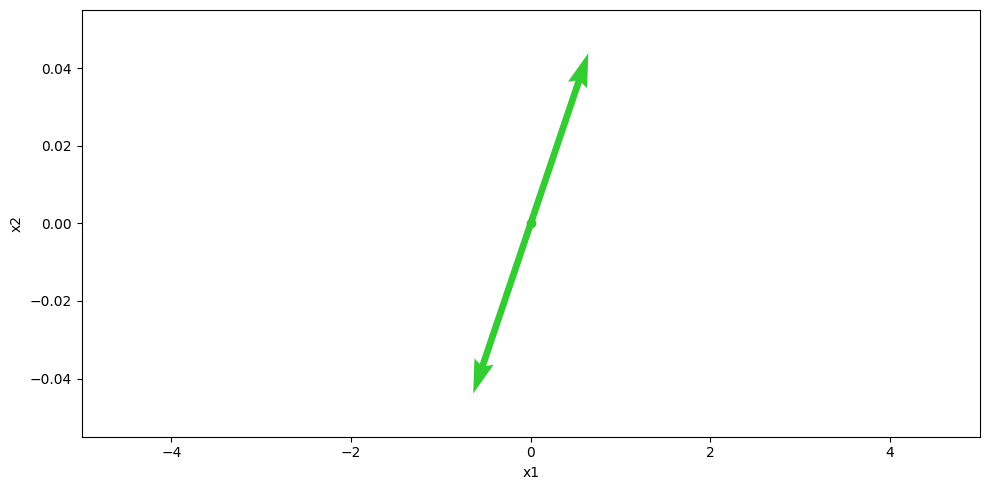

<Figure size 640x480 with 0 Axes>

In [181]:
# Plot the k-means clustering results
plt.figure(figsize=(10, 5))
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )

plt.scatter([0], [0], color="#33cc33")
plt.quiver(*np.array([0, 0]), *beta_1, scale=5, color="#33cc33")
plt.quiver(*np.array([0, 0]), *(-beta_1), scale=5, color="#33cc33")


# Show the plots
plt.tight_layout()
plt.show()
plt.savefig("kmeans_1")

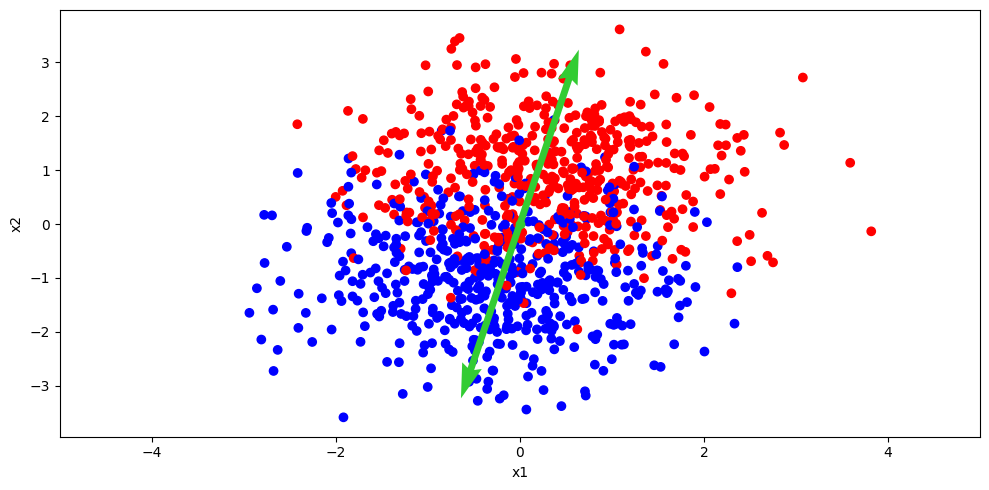

<Figure size 640x480 with 0 Axes>

In [182]:
# Plot the k-means clustering results
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[:2]))
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )

plt.scatter([0], [0], color="#33cc33")
plt.quiver(*np.array([0, 0]), *beta_1, scale=5, color="#33cc33")
plt.quiver(*np.array([0, 0]), *(-beta_1), scale=5, color="#33cc33")

# Show the plots
plt.tight_layout()
plt.show()
plt.savefig("kmeans_2")

### **Fully train on dataset**

In [183]:
#Fit model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [184]:
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [0.37535723 1.11927937]
Coefficient beta_1 MSE     :  [0.00303827 0.02956399]
Coefficient beta_1 MSE     :  0.1805609516790166
Accuracy is                :  0.833


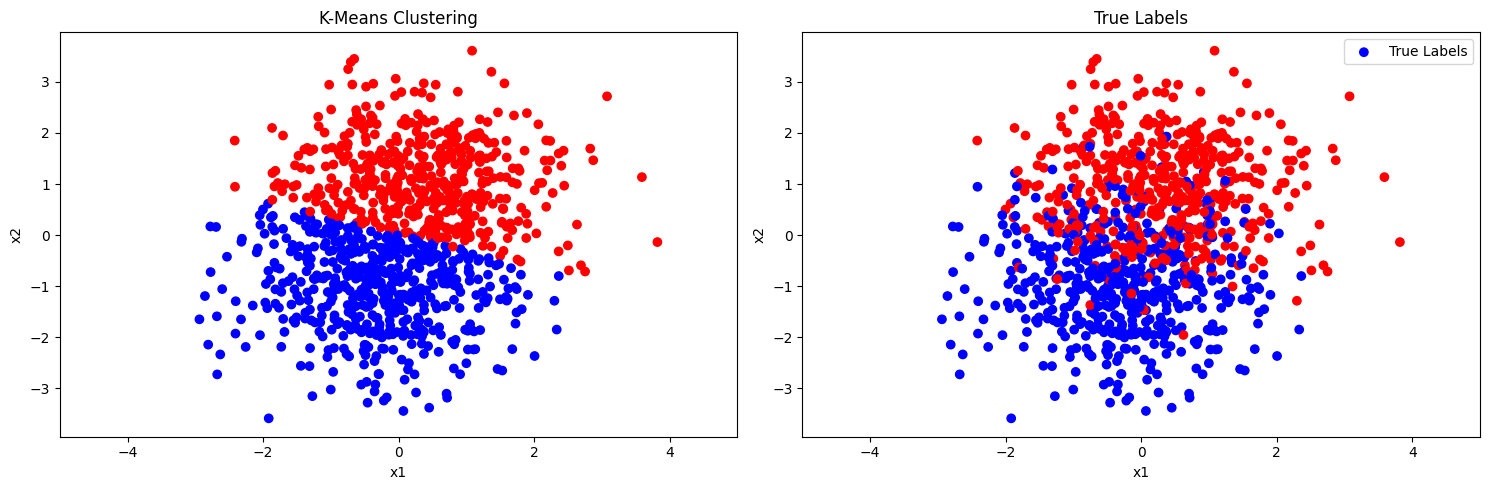

<Figure size 640x480 with 0 Axes>

In [185]:
# Plot the k-means clustering results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap=ListedColormap(colors[:2]), label='K-Means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('K-Means Clustering')

# Plot the true labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[:2]), label='True Labels')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('True Labels')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
plt.savefig("kmeans_3")

We now repeat our methodology from experiment one onto the KMeans

### **Random**

In [186]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_


index_random = genreate_random_indices(n)
X_random, y_random = X[index_random], y[index_random]

#Fit on outliers
kmeans.fit(X_random, y_random)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]

#Print accuracy
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [0.51841472 1.10103126]
Coefficient beta_1 MSE     :  [0.03927452 0.02362175]
Coefficient beta_1 MSE     :  0.25079129769129277
Accuracy is                :  0.831


### **Remove outliers**

In [187]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_

dist = []
for x in X[n//2:]:
  distances = np.linalg.norm(centers - x, axis=1)
  dist.append(min(distances))
sorted_dist = sorted(dist)
index_redundants = [i + n //2 for i in range(len(dist)) if dist[i] <= sorted_dist[len(sorted_dist) // 2]]
X_redundants, y_redundants = X[index_redundants], y[index_redundants]

#Fit on outliers
kmeans.fit(X_redundants, y_redundants)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]

#Print accuracy
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [0.37844584 1.14524369]
Coefficient beta_1 MSE     :  [0.0033883  0.03916684]
Coefficient beta_1 MSE     :  0.2062889694221666
Accuracy is                :  0.83


### **Remove redundant**

In [188]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_

dist = []
for x in X[n//2:]:
  distances = np.linalg.norm(centers - x, axis=1)
  dist.append(min(distances))
sorted_dist = sorted(dist)
index_outliers = [i + n //2 for i in range(len(dist)) if dist[i] > sorted_dist[len(sorted_dist) // 2]]
X_outliers, y_outliers = X[index_outliers], y[index_outliers]

#Fit on outliers
kmeans.fit(X_outliers, y_outliers)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]

#Print accuracy
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [ 1.15355313 -0.35027018]
Coefficient beta_1 MSE     :  [0.69441625 1.68378585]
Coefficient beta_1 MSE     :  1.5421420498848823
Accuracy is                :  0.537


### **Remove redundant + weights**

In [189]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred_prior =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]


#Create outliers dataset
dist = []
for x in X[n//2:]:
  distances = np.linalg.norm(centers - x, axis=1)
  dist.append(min(distances))
sorted_dist = sorted(dist)
index_outliers = [i + n //2 for i in range(len(dist)) if dist[i] > sorted_dist[len(sorted_dist) // 2]]
X_outliers, y_outliers = X[index_outliers], y[index_outliers]


#Fit on outliers
kmeans.fit(X_outliers, y_outliers)
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]

#Add weight to exisiting model
beta_1_pred = (1.5 * beta_1_pred_prior + 0.5 * beta_1_pred) / 2

#Print accuracy
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [ 1.15355313 -0.35027018]
Coefficient beta_1 MSE     :  [0.69441625 1.68378585]
Coefficient beta_1 MSE     :  1.5421420498848823
Accuracy is                :  0.537


### **Dynamically remove outliers**

We now experiment in dynamically removing outliers

In [190]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_

# Define threshold
threshold = 0.3

# Iterate over remaining data
batch = np.array([])
for i in range(n//2, n):
    x = X[i]
    distances = np.linalg.norm(centers - x, axis=1)
    char_distance = np.linalg.norm(centers[0] - centers[1])
    if np.min(distances) < threshold * char_distance:
      np.append(batch, x)
      if len(batch) > 1:
        kmeans.fit(batch.reshape(1, -1))
        centers = kmeans.cluster_centers_
        batch = np.array([])

In [191]:
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     :", beta_1)
print("beta_1_pred                :", beta_1_pred)
print("Coefficient beta_1 MSE     : ", (beta_1 - beta_1_pred)**2)
print("Coefficient beta_1 MSE     : ", np.sum((beta_1 - beta_1_pred)**2))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     : [0.32023671 0.94733756]
beta_1_pred                : [0.31287668 1.24166758]
Coefficient beta_1 MSE     :  [5.41700451e-05 8.66301649e-02]
Coefficient beta_1 MSE     :  0.08668433498035828
Accuracy is                :  0.827


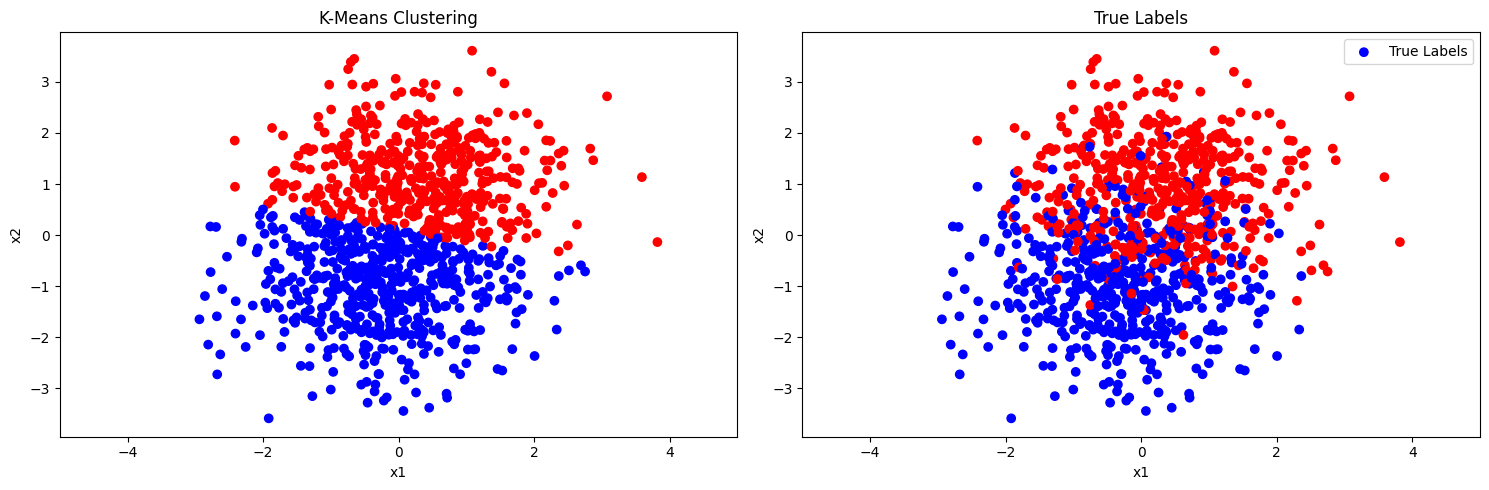

In [192]:
# Plot the k-means clustering results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap=ListedColormap(colors[:2]), label='K-Means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('K-Means Clustering')

# Plot the true labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[:2]), label='True Labels')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('True Labels')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

### **Dynamically remove redundant**

In [193]:
#Train on first half of the data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X[:n//2])
centers = kmeans.cluster_centers_

# Define threshold
threshold = 0.3

# Iterate over remaining data
batch = np.array([])
for i in range(n//2, n):
    x = X[i]
    distances = np.linalg.norm(centers - x, axis=1)
    char_distance = np.linalg.norm(centers[0] - centers[1])
    if np.min(distances) > threshold * char_distance:
      np.append(batch, x)
      if len(batch) > 1:
        kmeans.fit(batch.reshape(1, -1))
        centers = kmeans.cluster_centers_
        batch = np.array([])

In [194]:
centers = kmeans.cluster_centers_
labels = kmeans.predict(X)
class_map = {0: np.argmin(centers[:, 0]), 1: np.argmax(centers[:, 0])}
mapped_labels = np.array([class_map[label] for label in labels])
beta_1_pred =  kmeans.cluster_centers_[np.argmax(centers[:, 0])]
print("beta_1                     : ", beta_1)
print("beta_1_pred                : ", beta_1_pred)
print("Coefficient beta_1 MSE     : ", np.sqrt(np.sum((beta_1 - beta_1_pred)**2)))
print('Accuracy is                : ', np.mean(mapped_labels == y))

beta_1                     :  [0.32023671 0.94733756]
beta_1_pred                :  [0.33978628 1.22357971]
Coefficient beta_1 MSE     :  0.2769330446291536
Accuracy is                :  0.829


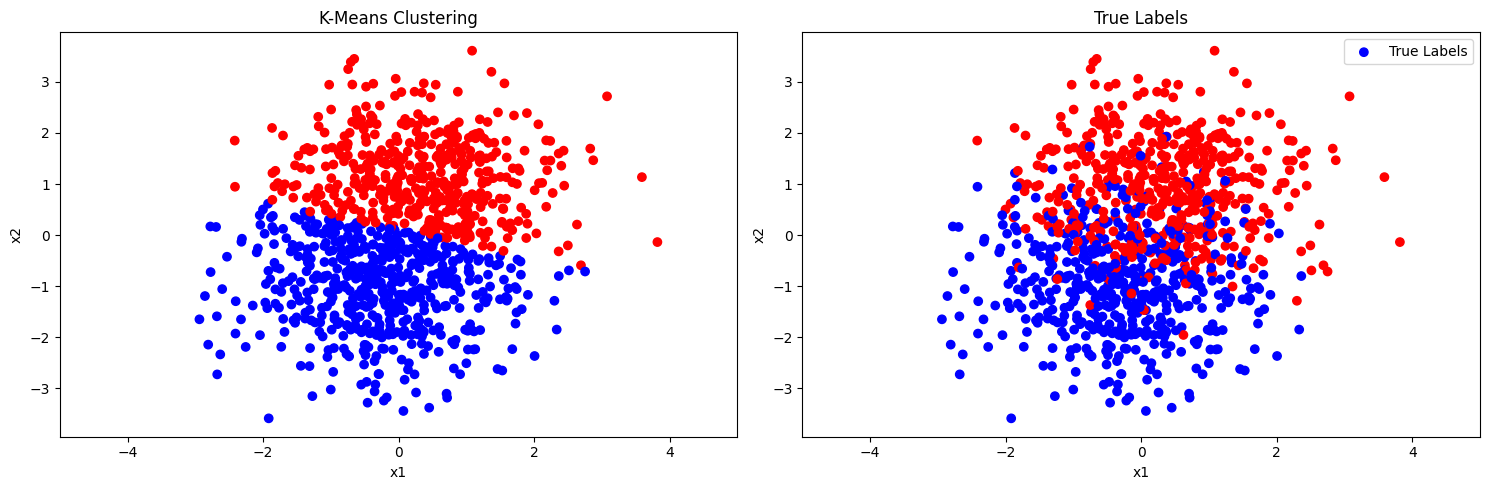

In [195]:
# Plot the k-means clustering results
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=mapped_labels, cmap=ListedColormap(colors[:2]), label='K-Means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('K-Means Clustering')

# Plot the true labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(colors[:2]), label='True Labels')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.xlim(-5  * signal_to_noise_ratio, 5 * signal_to_noise_ratio )
plt.title('True Labels')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

## **Other**

Below is some code that was used for our visuals in our slides

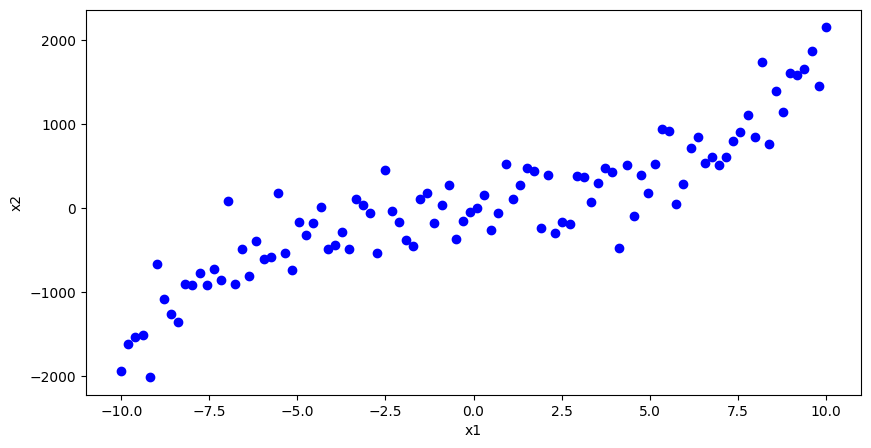

In [196]:
# Generate data from a degree 3 polynomial
x = np.linspace(-10, 10, 100)
y = 2 * x**3 - 0.5 * x**2 + 2 * x - 5 + np.random.normal(0, 300, (100,))

# Plot the data and model
plt.figure(figsize=(10, 5))
plt.scatter(x, y, c='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

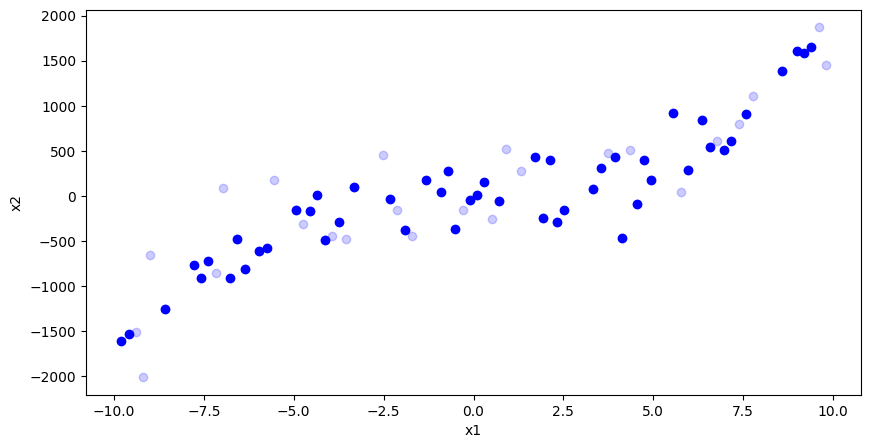

In [197]:
# Remove 30% of the data randomly
idx = np.random.choice(len(x), size=int(len(x)*0.5), replace=False)
x_sampled = x[idx]
y_sampled = y[idx]


# Plot the data and model
plt.figure(figsize=(10, 5))
plt.scatter(x[~idx], y[~idx], c='b', alpha=0.2)
plt.scatter(x[idx], y[idx], c='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

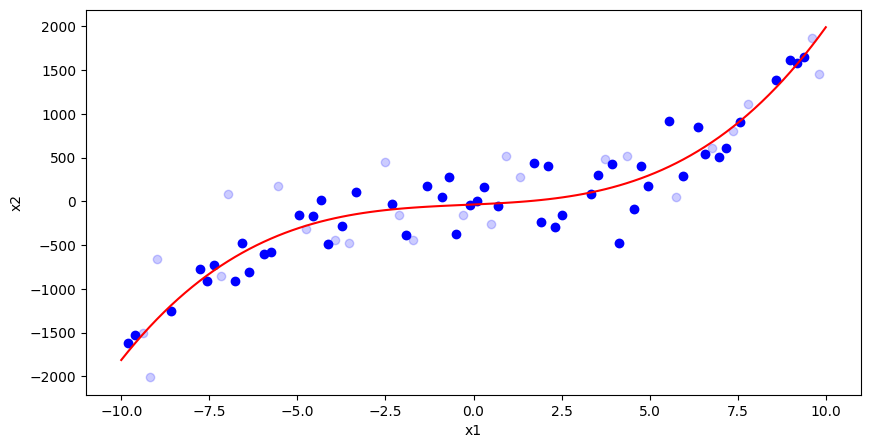

In [198]:
# Fit a degree 3 polynomial model to the sampled data
model = np.poly1d(np.polyfit(x_sampled, y_sampled, 3))


# Plot the data and model
plt.figure(figsize=(10, 5))
plt.scatter(x[~idx], y[~idx], c='b', alpha=0.2)
plt.scatter(x[idx], y[idx], c='b')
plt.plot(x, model(x), c='r')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

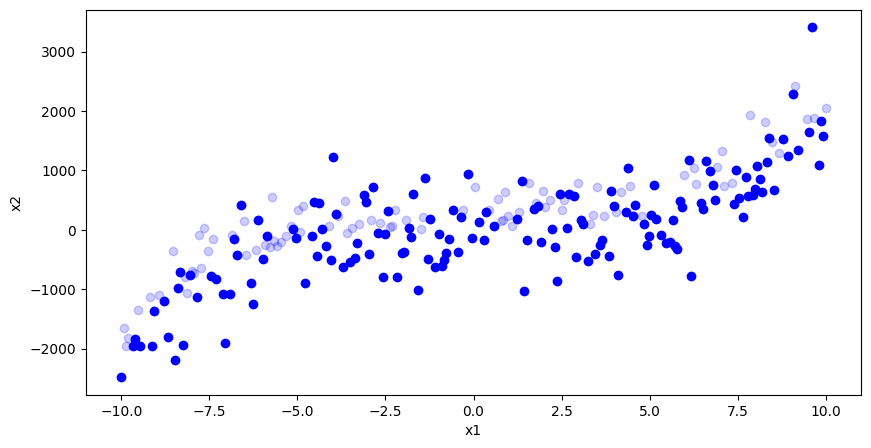

In [199]:
import statistics
N = 300
x = np.linspace(-10, 10, N)
noise = np.random.normal(0, 500, (N,))
y = 2 * x**3 - 0.5 * x**2 + 2 * x - 5  + noise
idx = np.array([i for i in range(N) if noise[i] > statistics.median(noise)])


# Plot the data and model
plt.figure(figsize=(10, 5))
plt.scatter(x[idx], y[idx], c='b', alpha=0.2)
plt.scatter(x[~idx], y[~idx], c='b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

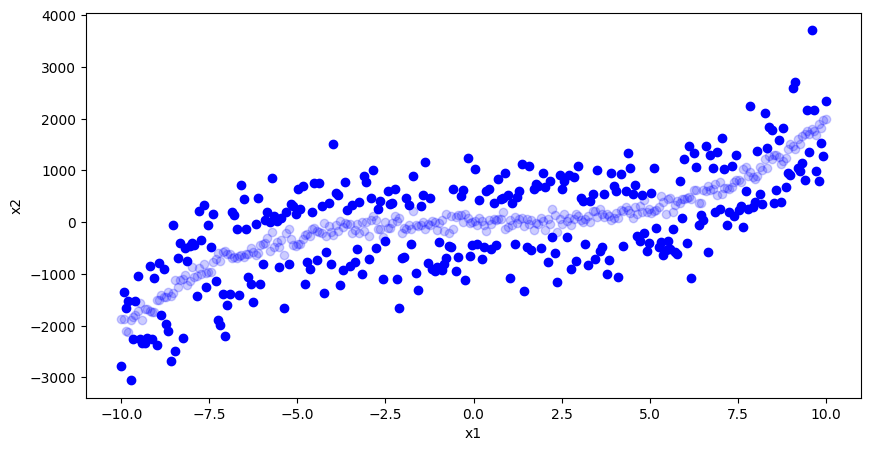

In [200]:
N = 300
x = np.linspace(-10, 10, N)
noise1 = np.random.normal(0, 500, (N,))
noise1 = [no + np.sign(no) * 300 for no in noise]
y1 = 2 * x**3 - 0.5 * x**2 + 2 * x - 5  + noise1


noise2 = np.random.normal(0, 100, (N,))
y2 = 2 * x**3 - 0.5 * x**2 + 2 * x - 5  + noise2


# Plot the data and model
plt.figure(figsize=(10, 5))
plt.scatter(x, y1, c='b')
plt.scatter(x, y2,  c='b', alpha=0.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Experiment 3: JSD Experiment Performance
Here we transition to our third experiment which will implement Ossi's method. There are four different settings within this experiment. These are different baselines and then the fourth setting is the implementation with JSD. For each of the the four settings we will output a normalized confusion matrix along with accuracy metrics.

## Note: the settings are not in chronological order.

To start we import and initialize our language model

In [1]:
#Install transformers library and confusion matrix library
!pip install transformers pycm==3.9
import warnings
warnings.filterwarnings("ignore")
import random
random.seed(299)

In [2]:
from transformers import BertTokenizer, BertModel

#Choose a pretrained model from the transformers library
lm_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(lm_name)

In [3]:
#Select a classification dataset with two columns, 'text' and 'category'
#!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

# Downloaded manualy 

In [3]:

import pandas as pd
import numpy as np
df = pd.read_csv('/Users/hagitbenshoshan/Documents/PHD/NN/bbc-text.csv')

In [4]:
#Create bag of words representation
from collections import Counter

all_bow = df['text'].apply(lambda text : Counter(text.split()))

list_of_counters = all_bow

# Get the unique keys from all the counters
keys = sorted(set().union(*list_of_counters))

# Create a dictionary with keys as column names and values as arrays
col_arrays = {key: np.zeros(len(list_of_counters), dtype=int) for key in keys}
for i, counter in enumerate(list_of_counters):
    for key in counter:
        col_arrays[key][i] = counter[key]

# Stack the column arrays horizontally to create a matrix
matrix = np.column_stack(list(col_arrays.values()))

df['bow'] = list(matrix)

In [5]:
import torch

#Convert labels to integers
labels = {cat:i for i, cat in enumerate(df.category.unique())}

#Create dataset class
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        self.labels = [labels[label] for label in df['category']]
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [6]:
#Create a transformer classifier
class LMClassifier(torch.nn.Module):
    def __init__(self, n_labels):
        super(LMClassifier, self).__init__()

        self.bert = BertModel.from_pretrained(lm_name, force_download=True)
        self.linear = torch.nn.Linear(768, n_labels)
        self.activation = torch.nn.Softmax(dim=1)

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        linear_output = self.linear(pooled_output)
        final_layer = self.activation(linear_output)

        return final_layer

In [7]:
#create training script
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs, batch_size):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=batch_size)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = torch.nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)

                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()

                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()

            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc

            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')

In [8]:
#create evaluation script, returns confusion matrix
def evaluate(model, test_data, batch_size):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=batch_size)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    confusion_matrix = np.zeros((len(labels), len(labels)))

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              for pred, true in zip(output.argmax(dim=1), test_label):
                confusion_matrix[true, pred] += 1

    return confusion_matrix

In [13]:
#Define hyperparameters
import copy
from pycm import ConfusionMatrix
import matplotlib.pyplot as plt

EPOCHS = 2
LR = 5e-6
BATCH_SIZE = 16
N_TESTS = 1

# Setting 3: Baseline Performance


For this setting of the third experiment we split the training dataset into 3 equal parts, randomly. We train on 1/3 of the train data and then end up labeling and training on an additional 10 percent of the previously unlabelled data randomly.

In [14]:
FINAL_CONF_MATRIX = np.zeros((len(labels), len(labels)))
for _ in range(N_TESTS):
  #Split data into training, additional, validation, and test
  df_train, df_val, df_test = np.split(df.sample(frac=1), [int(0.4 * len(df)), int(0.5*len(df))])

  MODEL = LMClassifier(len(labels))

  train(MODEL, df_train, df_val, LR, EPOCHS, BATCH_SIZE)
  CONF_MATRIX = evaluate(MODEL, df_test, BATCH_SIZE)
  FINAL_CONF_MATRIX += CONF_MATRIX

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

  0%|          | 0/56 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

Overall Statistics : 

ACC Macro                                                         nan
F1 Macro                                                          nan
FPR Macro                                                         nan
Kappa                                                             nan
NPV Macro                                                         nan
Overall ACC                                                       nan
PPV Macro                                                         nan
SOA1(Landis & Koch)                                               None
TPR Macro                                                         nan
Zero-one Loss                                                     0

Class Statistics :

Classes                                                           0             1             2             3             4             
ACC(Accuracy)                                                     nan           nan           nan           nan         

ValueError: cannot convert float NaN to integer

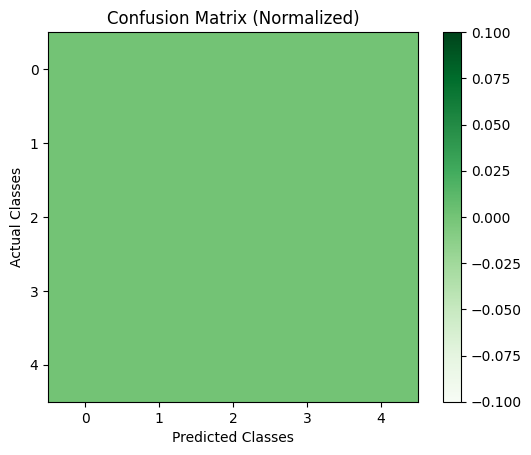

In [11]:
cm = ConfusionMatrix(matrix=FINAL_CONF_MATRIX.astype(int))
cm.stat(summary=True)
cm.plot(cmap=plt.cm.Greens, number_label=True, normalized=True)

The results show the corresponding confusion matrix along with various accuracy metrics. Overall accuracy is about 90% and we can see there is some confusion within the confusion matrix. The results are better than the minimum performance below and worse than the maximum performance.

# Setting 1: Minimum Performance

For this setting of the third experiment we train on only 1/3 of the data.


In [ ]:
FINAL_CONF_MATRIX = np.zeros((len(labels), len(labels)))
for _ in range(N_TESTS):
  #Split data into training, additional, validation, and test
  df_train, df_val, df_test = np.split(df.sample(frac=1), [int(0.3 * len(df)), int(0.5*len(df))])

  MODEL = LMClassifier(len(labels))

  train(MODEL, df_train, df_val, LR, EPOCHS, BATCH_SIZE)
  CONF_MATRIX = evaluate(MODEL, df_test, BATCH_SIZE)
  FINAL_CONF_MATRIX += CONF_MATRIX

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 42/42 [00:53<00:00,  1.26s/it]


Epochs: 1 | Train Loss:  0.098                 | Train Accuracy:  0.405                 | Val Loss:  0.092                 | Val Accuracy:  0.663


100%|██████████| 42/42 [00:53<00:00,  1.27s/it]


Epochs: 2 | Train Loss:  0.086                 | Train Accuracy:  0.837                 | Val Loss:  0.082                 | Val Accuracy:  0.901


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 42/42 [00:53<00:00,  1.26s/it]


Epochs: 1 | Train Loss:  0.099                 | Train Accuracy:  0.360                 | Val Loss:  0.096                 | Val Accuracy:  0.445


100%|██████████| 42/42 [00:53<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.090                 | Train Accuracy:  0.690                 | Val Loss:  0.086                 | Val Accuracy:  0.885


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 42/42 [00:53<00:00,  1.26s/it]


Epochs: 1 | Train Loss:  0.100                 | Train Accuracy:  0.282                 | Val Loss:  0.097                 | Val Accuracy:  0.398


100%|██████████| 42/42 [00:53<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.091                 | Train Accuracy:  0.741                 | Val Loss:  0.086                 | Val Accuracy:  0.885


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 42/42 [00:53<00:00,  1.27s/it]


Epochs: 1 | Train Loss:  0.098                 | Train Accuracy:  0.438                 | Val Loss:  0.094                 | Val Accuracy:  0.645


100%|██████████| 42/42 [00:53<00:00,  1.27s/it]


Epochs: 2 | Train Loss:  0.088                 | Train Accuracy:  0.730                 | Val Loss:  0.083                 | Val Accuracy:  0.730


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 42/42 [00:53<00:00,  1.26s/it]


Epochs: 1 | Train Loss:  0.099                 | Train Accuracy:  0.498                 | Val Loss:  0.094                 | Val Accuracy:  0.856


100%|██████████| 42/42 [00:53<00:00,  1.27s/it]


Epochs: 2 | Train Loss:  0.088                 | Train Accuracy:  0.933                 | Val Loss:  0.082                 | Val Accuracy:  0.969


Overall Statistics : 

ACC Macro                                                         0.95285
F1 Macro                                                          0.8797
FPR Macro                                                         0.02992
Kappa                                                             0.85168
NPV Macro                                                         0.97132
Overall ACC                                                       0.88212
PPV Macro                                                         0.89556
SOA1(Landis & Koch)                                               Almost Perfect
TPR Macro                                                         0.87363
Zero-one Loss                                                     656

Class Statistics :

Classes                                                           0             1             2             3             4             
ACC(Accuracy)                                                     0.92561    

<Axes: title={'center': 'Confusion Matrix (Normalized)'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

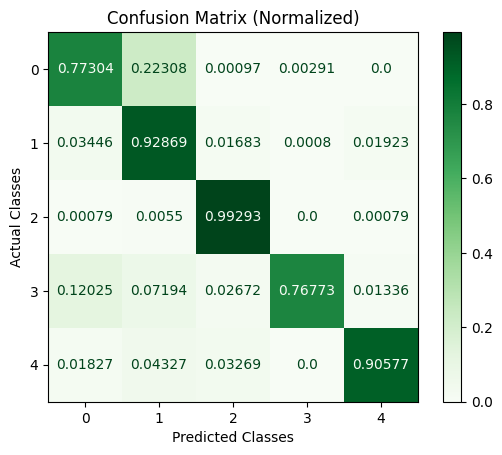

In [ ]:
cm = ConfusionMatrix(matrix=FINAL_CONF_MATRIX.astype(int))
cm.stat(summary=True)
cm.plot(cmap=plt.cm.Greens, number_label=True, normalized=True)

The results show the corresponding confusion matrix along with various accuracy metrics. As expected the accuracy is the lowest at about 82 percent and there is the most confusion in the confusion matrix.

#Setting 4: JSD Experiment Performance



For this experiment, we take the training data and split it into three parts, randomly. We separate one of the parts and combine the other two parts to have a df_train (1/3). We then do the JSD method oultined below on 10% of the previously unlabelled data.

For the whole data, we compute the bag of words (bow) representation of each document.

$$\forall i\in \{1, ..., |\text{df_train}|\}. \text{df_train_bow}(i) = \text{counter} (\text{df_train}(i))$$
$$\forall i\in \{1, ..., |\text{df_addl}|\}. \text{df_addl_bow}(i) = \text{counter} (\text{df_addl}(i))$$

Next, we find the mean for the df_train.

$$\mu_{\text{train}} = \frac{1}{|\text{df_train}|}\sum_{i = 1}^{|\text{df_train}|}\text{df_train_bow}(i) $$

Then, we compute the signatures as the differences between the mean bag of words vector and each of the bag of words representations.

$$\forall i \in \{1, ..., |\text{df_train}|\}. \text{df_train_signature}(i) = \text{jsd_difference}(\text{df_train_bow}(i), \mu_{\text{train}})$$
$$\forall i \in \{1, ..., |\text{df_addl}|\}. \text{df_addl_signature}(i) = \text{jsd_difference}(\text{df_addl_bow}(i), \mu_{\text{train}})$$

Where the jsd_difference is the element-wise Jensen-Shannon divergence function.If $v = \text{jsd_difference}(v_1, v_2)$, then

$$v^* (j) = \frac{1}{2}v_1(j) \log \frac{v_1(j) + v_2(j)}{2 v_1(j)} + \frac{1}{2}v_2(j) \log \frac{v_1(j) + v_2(j)}{2 v_2(j)}$$
$$v (j) = \begin{cases}-v^*(j) & \text{if } \frac{1}{2}(v_1(j) + v_2(j)) < v_2(j) \text{ and }|v^*(j)| \geq t\\ v^*(j)&\text{if } \frac{1}{2}(v_1(j) + v_2(j)) \geq v_2(j) \text{ and }|v^*(j)| \geq t\\ 0 & \text{ if }|v^*(j)| < t\end{cases}$$

Next, Where $t$ is the $r$-th largest element in magnitude. We select a $t$ such that it is in the 98-th percentile in absolute value in each signature.

Next, we compute the distance between each signature in the additional set to each signature in the training set.

$$\forall i \in \{1 ..., |\text{df_addl}|\}. \text{df_addl_distances}(i) = \text{Reduction}_j(||\text{df_addl_signature}(i) - \text{df_train_signature}(j)||_p)$$

We can choose an L2 or L1 distance by varying $p$. And for the reduction function accross all $j$, we can choose it as any clustering linkage function. We suggest either the minimum or the average.

Finally, we sort the vector $\text{df_addl_distances}$ and take the top 50%. We train on the samples in the top 50% of $\text{df_addl_distances}$ plus the original $\text{df_train}$.

In [ ]:
FINAL_CONF_MATRIX = np.zeros((len(labels), len(labels)))
for _ in range(N_TESTS):
  #Split data into training, additional, validation, and test
  df_train, df_addl, df_test = np.split(df.sample(frac=1), [int(0.3 * len(df)), int(0.5*len(df))])

  MODEL = LMClassifier(len(labels))

  bow_mean = df_train['bow'].mean()

  def jsd_signaturizer(item):
    M = (bow_mean + item) / 2
    S = bow_mean * np.nan_to_num(np.log2(M/bow_mean)) / 2 + item * np.nan_to_num(np.log2(M/item)) / 2
    res = np.array([s if m >= b else -s for s, b, m in zip(S, bow_mean, M)])
    args = abs(res).argsort()
    res[args[:int(0.98 * len(args))]] = 0.0
    return res

  df_train['signatures_jsd'] = df_train['bow'].apply(jsd_signaturizer)
  df_addl['signatures_jsd'] = df_addl['bow'].apply(jsd_signaturizer)

  l2_dist = lambda v1, v2 : np.linalg.norm(v1 - v2)
  jsd_signatures_distances = df_addl['signatures_jsd'].apply(lambda v1 : df_train['signatures_jsd'].apply(lambda v2 : l2_dist(v1, v2)).min())

  inds_to_add_top = jsd_signatures_distances.sort_values().index[len(df_addl)//2:]
  inds_to_add_bttm = jsd_signatures_distances.sort_values().index[:len(df_addl)//2]
  df_val = df_addl.loc[inds_to_add_bttm]

  df_train_jsd_signature_top = pd.concat([df_addl.loc[inds_to_add_top], df_train], ignore_index=True, axis=0)

  train(MODEL, df_train_jsd_signature_top, df_val, LR, EPOCHS, BATCH_SIZE)
  CONF_MATRIX = evaluate(MODEL, df_test, BATCH_SIZE)
  FINAL_CONF_MATRIX += CONF_MATRIX

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 56/56 [01:11<00:00,  1.27s/it]


Epochs: 1 | Train Loss:  0.096                 | Train Accuracy:  0.564                 | Val Loss:  0.091                 | Val Accuracy:  0.752


100%|██████████| 56/56 [01:11<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.084                 | Train Accuracy:  0.908                 | Val Loss:  0.079                 | Val Accuracy:  0.928


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 56/56 [01:11<00:00,  1.27s/it]


Epochs: 1 | Train Loss:  0.096                 | Train Accuracy:  0.584                 | Val Loss:  0.088                 | Val Accuracy:  0.860


100%|██████████| 56/56 [01:11<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.082                 | Train Accuracy:  0.940                 | Val Loss:  0.075                 | Val Accuracy:  0.982


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 56/56 [01:10<00:00,  1.27s/it]


Epochs: 1 | Train Loss:  0.096                 | Train Accuracy:  0.583                 | Val Loss:  0.091                 | Val Accuracy:  0.730


100%|██████████| 56/56 [01:11<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.084                 | Train Accuracy:  0.851                 | Val Loss:  0.079                 | Val Accuracy:  0.883


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 56/56 [01:11<00:00,  1.27s/it]


Epochs: 1 | Train Loss:  0.098                 | Train Accuracy:  0.494                 | Val Loss:  0.094                 | Val Accuracy:  0.689


100%|██████████| 56/56 [01:11<00:00,  1.28s/it]


Epochs: 2 | Train Loss:  0.088                 | Train Accuracy:  0.838                 | Val Loss:  0.082                 | Val Accuracy:  0.905


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 56/56 [01:11<00:00,  1.28s/it]


Epochs: 1 | Train Loss:  0.098                 | Train Accuracy:  0.560                 | Val Loss:  0.094                 | Val Accuracy:  0.887


100%|██████████| 56/56 [01:12<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.086                 | Train Accuracy:  0.940                 | Val Loss:  0.081                 | Val Accuracy:  0.950


Overall Statistics : 

ACC Macro                                                         0.97506
F1 Macro                                                          0.93328
FPR Macro                                                         0.01561
Kappa                                                             0.92164
NPV Macro                                                         0.98491
Overall ACC                                                       0.93765
PPV Macro                                                         0.9399
SOA1(Landis & Koch)                                               Almost Perfect
TPR Macro                                                         0.93255
Zero-one Loss                                                     347

Class Statistics :

Classes                                                           0             1             2             3             4             
ACC(Accuracy)                                                     0.97197    

<Axes: title={'center': 'Confusion Matrix (Normalized)'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

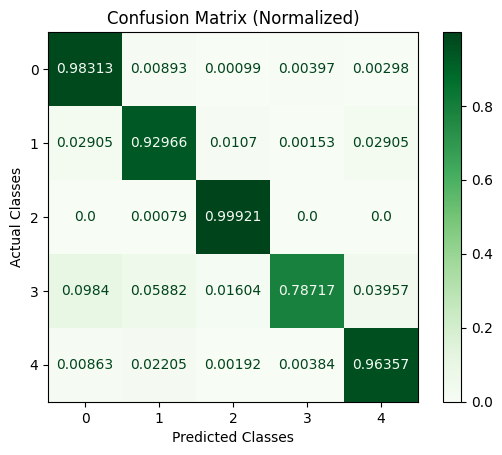

In [ ]:
cm = ConfusionMatrix(matrix=FINAL_CONF_MATRIX.astype(int))
cm.stat(summary=True)
cm.plot(cmap=plt.cm.Greens, number_label=True, normalized=True)

We see that the method worked better than the the baseline. Our overall accuracy is about 96 percent equal to our maximum performance when we train on more data (50% of the data set). The confusion matrix also looks good. The method works as we have trained on less data and received better results.

# Setting 2: Maximum Performance


For this experiment, we train on half the dataset

In [ ]:
FINAL_CONF_MATRIX = np.zeros((len(labels), len(labels)))
for _ in range(N_TESTS):
  #Split data into training, additional, validation, and test
  df_train, df_test = np.split(df.sample(frac=1), [int(0.5 * len(df))])

  MODEL = LMClassifier(len(labels))

  train(MODEL, df_train, df_test, LR, EPOCHS, BATCH_SIZE)
  CONF_MATRIX = evaluate(MODEL, df_test, BATCH_SIZE)
  FINAL_CONF_MATRIX += CONF_MATRIX

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 70/70 [01:29<00:00,  1.29s/it]


Epochs: 1 | Train Loss:  0.095                 | Train Accuracy:  0.588                 | Val Loss:  0.087                 | Val Accuracy:  0.814


100%|██████████| 70/70 [01:30<00:00,  1.29s/it]


Epochs: 2 | Train Loss:  0.077                 | Train Accuracy:  0.949                 | Val Loss:  0.069                 | Val Accuracy:  0.968


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 70/70 [01:29<00:00,  1.28s/it]


Epochs: 1 | Train Loss:  0.097                 | Train Accuracy:  0.466                 | Val Loss:  0.090                 | Val Accuracy:  0.877


100%|██████████| 70/70 [01:30<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.081                 | Train Accuracy:  0.953                 | Val Loss:  0.072                 | Val Accuracy:  0.973


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 70/70 [01:29<00:00,  1.28s/it]


Epochs: 1 | Train Loss:  0.094                 | Train Accuracy:  0.566                 | Val Loss:  0.085                 | Val Accuracy:  0.832


100%|██████████| 70/70 [01:30<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.078                 | Train Accuracy:  0.925                 | Val Loss:  0.069                 | Val Accuracy:  0.976


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 70/70 [01:30<00:00,  1.29s/it]


Epochs: 1 | Train Loss:  0.096                 | Train Accuracy:  0.629                 | Val Loss:  0.086                 | Val Accuracy:  0.916


100%|██████████| 70/70 [01:30<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.077                 | Train Accuracy:  0.964                 | Val Loss:  0.070                 | Val Accuracy:  0.973


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 70/70 [01:29<00:00,  1.28s/it]


Epochs: 1 | Train Loss:  0.096                 | Train Accuracy:  0.514                 | Val Loss:  0.089                 | Val Accuracy:  0.834


100%|██████████| 70/70 [01:30<00:00,  1.30s/it]


Epochs: 2 | Train Loss:  0.080                 | Train Accuracy:  0.949                 | Val Loss:  0.072                 | Val Accuracy:  0.975


Overall Statistics : 

ACC Macro                                                         0.98915
F1 Macro                                                          0.97246
FPR Macro                                                         0.00683
Kappa                                                             0.96594
NPV Macro                                                         0.99325
Overall ACC                                                       0.97287
PPV Macro                                                         0.97311
SOA1(Landis & Koch)                                               Almost Perfect
TPR Macro                                                         0.9719
Zero-one Loss                                                     151

Class Statistics :

Classes                                                           0             1             2             3             4             
ACC(Accuracy)                                                     0.9885     

<Axes: title={'center': 'Confusion Matrix (Normalized)'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

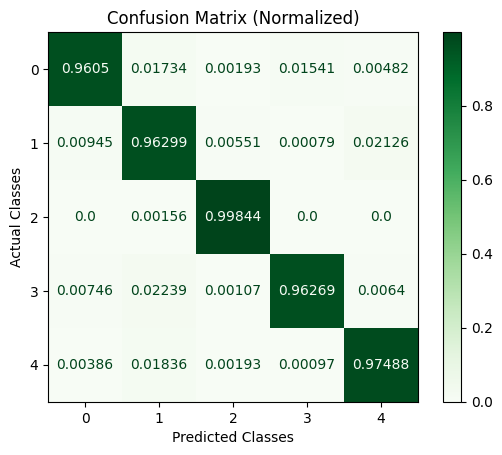

In [ ]:
cm = ConfusionMatrix(matrix=FINAL_CONF_MATRIX.astype(int))
cm.stat(summary=True)
cm.plot(cmap=plt.cm.Greens, number_label=True, normalized=True)

The corresponding confusion matrix and other metrics show the results of setting 2 above. The overall maximum accuracy is about 96 percent. We train on fifty percent of the data the most out of the four settings.

# Conclusion

To conclude the third experiment shows that the method works. In setting 4 we achieve equal accuracy while training on less data than in setting 2. Additionally there is a 6% increase in overall accuracy and less confusion between settings 3 and 4. Readers should refer to the accompanying report/blog post for additional information and analysis